In [0]:
# Import libraries and enable eager execution.
import tensorflow as tf

tf.enable_eager_execution()

TensorFlow tensors are immutable. In order to make the parameters in model training chgangable, there are basically two ways, one is to use Python state, the other is to use TensorFlow variables.

In [2]:
# Use Python state.
x = tf.zeros([10, 10])
x += 5
print(x)

# If not in eager execution mode, a session is needed to print out the tensor.
# with tf.Session() as sess:
#     print(sess.run(x))

tf.Tensor(
[[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]], shape=(10, 10), dtype=float32)


In [3]:
# Use TensorFlow variable.
v = tf.Variable(1.0)
print(v.numpy() == 1.0)

v.assign(2)  # reassign value
print(v.numpy() == 2.0)

v.assign(tf.square(v))
print(v.numpy() == 4)

True
True
True


Using variables are recommended in model building due to its mutability. Variables are also passed into loss function and gradient calculation, which is essential for training. It also makes it clear that this variable is designed to be changable.

Next step, let's manually design a linear model and fit it with generated data points.

In [4]:
# Model definition.
class linear_model(object):
    def __init__(self):
    # randomly initialize the parameters
        self.W = tf.Variable(tf.random.uniform(shape=[1,]))
        self.b = tf.Variable(tf.random.uniform(shape=[1,]))

    def __call__(self, x):
        # return predicted values when calling linear_model with input
        return self.W * x + self.b
    
model = linear_model()
print(model.W.numpy(), model.b.numpy())

[0.72907364] [0.39584565]


In [0]:
# Define loss function as L2 loss.
def loss(predicted, label):
    return tf.reduce_mean(tf.square(predicted - label))

In [0]:
# Create dataset.
TRUE_W = 3.0
TRUE_b = 5.0
NUM_POINTS = 1000

input_data = tf.random_normal(shape=[NUM_POINTS,])
noise = tf.random_normal(shape=[NUM_POINTS,])
labels = TRUE_W * input_data + TRUE_b + noise

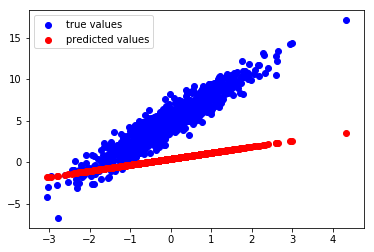

Current loss = 25.68064


In [8]:
# Visualize dataset.
import matplotlib.pyplot as plt

plt.scatter(input_data, labels, c='b', label='true values')
plt.scatter(input_data, model(input_data), c='r', label='predicted values')
plt.legend()
plt.show()

print('Current loss =', loss(model(input_data), labels).numpy())

In [0]:
# Define training step.
def train(model, input_data, labels, lr=0.1):
    with tf.GradientTape() as t:
        cur_loss = loss(model(input_data), labels)
    dW, db = t.gradient(cur_loss, [model.W, model.b])
    model.W.assign_sub(lr * dW)  # same as model.W = model.W - dW * lr, but model.W -= dW * lr will raise an error since -= is not supported here
    model.b.assign_sub(lr * db)

epoch 0: W = 0.016300, b = 0.977650, loss = 23.905270
epoch 1: W = 0.520591, b = 1.752604, loss = 16.153639
epoch 2: W = 0.938536, b = 2.378058, loss = 11.021816
epoch 3: W = 1.284736, b = 2.882972, loss = 7.622425
epoch 4: W = 1.571364, b = 3.290674, loss = 5.369369
epoch 5: W = 1.808557, b = 3.619956, loss = 3.875287
epoch 6: W = 2.004755, b = 3.885965, loss = 2.883999
epoch 7: W = 2.166972, b = 4.100909, loss = 2.225981
epoch 8: W = 2.301040, b = 4.274630, loss = 1.788982
epoch 9: W = 2.411801, b = 4.415067, loss = 1.498636


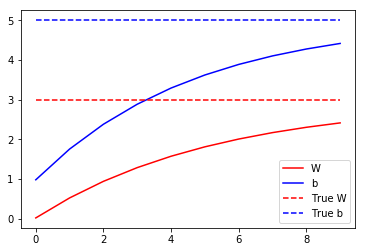

In [10]:
# Train the model.
model = linear_model()

W_hist, b_hist, loss_hist = [], [], []
epochs = range(10)

for epoch in epochs:
    W_hist.append(model.W.numpy())
    b_hist.append(model.b.numpy())
    loss_hist.append(loss(model(input_data), labels))
    
    train(model, input_data, labels)
    print('epoch %d: W = %2f, b = %2f, loss = %4f' % (epoch, W_hist[-1], b_hist[-1], loss_hist[-1]))
    
# Plot the training curves.
plt.plot(epochs, W_hist, 'r',
         epochs, b_hist, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

From the above model and training procedure, we walked through how to use TensorFlow variables in parameter training. The  final result also looks pretty well. And our next step is to build customer layers.

From the first part of the notebooks, we used a lot of keras API in TensorFlow. A very important and useful tool for model construction is [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers), which contains lots of common layers including convolution layer, pooling layer, LSTM, etc. For fully connected layers, simply use tf.keras.Dense, which takes the first argument as the output dimension. The input dimension is unnecessary to mention but it could be done to make model structure clear.

In [11]:
from tensorflow import keras

layer = keras.layers.Dense(10, input_shape=[None, 5])
layer(tf.zeros([10, 5]))

<tf.Tensor: id=795, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [12]:
# Examples of layer properties.
layer.variables

[<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.15337157,  0.41158837,  0.14686817, -0.18788975, -0.478259  ,
          0.5610247 ,  0.22460544,  0.29498428, -0.53503984,  0.54511374],
        [-0.44847316, -0.47908005,  0.07605171,  0.08498174, -0.3944341 ,
          0.31487578,  0.08941239, -0.4423712 , -0.32312667, -0.02983165],
        [ 0.14009911,  0.2110644 ,  0.14282644, -0.23011148, -0.54346716,
          0.556433  , -0.4009411 ,  0.5451624 ,  0.270988  ,  0.3585425 ],
        [ 0.03300124,  0.49026722, -0.57781   ,  0.2491231 , -0.09832478,
          0.46436018, -0.49911433, -0.10330564, -0.6116047 ,  0.23344284],
        [-0.1690084 , -0.11678046, -0.4738006 , -0.60344535,  0.39078134,
          0.3757741 ,  0.15238512, -0.42121696,  0.5638569 , -0.55360925]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [13]:
# Alternative way to obtain weights and bias.
layer.kernel, layer.bias

(<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.15337157,  0.41158837,  0.14686817, -0.18788975, -0.478259  ,
          0.5610247 ,  0.22460544,  0.29498428, -0.53503984,  0.54511374],
        [-0.44847316, -0.47908005,  0.07605171,  0.08498174, -0.3944341 ,
          0.31487578,  0.08941239, -0.4423712 , -0.32312667, -0.02983165],
        [ 0.14009911,  0.2110644 ,  0.14282644, -0.23011148, -0.54346716,
          0.556433  , -0.4009411 ,  0.5451624 ,  0.270988  ,  0.3585425 ],
        [ 0.03300124,  0.49026722, -0.57781   ,  0.2491231 , -0.09832478,
          0.46436018, -0.49911433, -0.10330564, -0.6116047 ,  0.23344284],
        [-0.1690084 , -0.11678046, -0.4738006 , -0.60344535,  0.39078134,
          0.3757741 ,  0.15238512, -0.42121696,  0.5638569 , -0.55360925]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

In order to create your own layer, simply extend tf.keras.layers.Layer by initializing it and also write the 'build' and 'call' functions. The example shown below could be a template for a customized layer. Note that there is **no need** to create variables until 'build' is called.

In [14]:
class CustomerLayer(keras.layers.Layer):
    def __init__(self, dim_out):
        super(CustomerLayer, self).__init__()
        self.dim_out = dim_out
        
    def build(self, dim_in):
        self.kernel = self.add_variable('kernel', shape=[int(dim_in[-1]), self.dim_out])
        
    def call(self, x):
        return tf.matmul(x, self.kernel)
    
layer = CustomerLayer(10)
print(layer(tf.zeros([10, 5])))
print(layer.variables)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'customer_layer/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.5132259 ,  0.34551853, -0.3841396 ,  0.03573883,  0.32447535,
        -0.31743303,  0.1278202 ,  0.43271214, -0.01682025,  0.13654095],
       [-0.3266277 , -0.44831032, -0.1155327 , -0.24987406, -0.20204705,
        -0.2049861 ,  0.28114247,  0.5203808 ,  0.5744119 , -0.34463492],
       [ 0.15375215, -0.5221647 ,  0.53033584,  0.24736267, -0.56111836,
        -0.05968928,  0.06877178, -0.3968579 , -0.4711244 ,  0.0989421 ],
       [ 0.48695618,  0.53242844, -0.42938733, -0.4774788 ,  0.29789615,
        -0.13008446, -0.13698077,  0

And to create a model with several different layers, if the layers are stacked one by one, which is a usual case of neural network, simply use tf.keras.Sequential as what we have implemented in the first section of the repository. However, if not, then we can implement it based on tf,keras,Model.

In [15]:
# Use tf.keras.Sequential to stack layers.
resnet = keras.Sequential([keras.layers.Conv2D(1, [1, 1]),
                           keras.layers.BatchNormalization(),
                           keras.layers.Conv2D(2, 1, padding='same'),
                           keras.layers.BatchNormalization(),
                           keras.layers.Conv2D(3, [1, 1]),
                           keras.layers.BatchNormalization()])

resnet(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: id=1045, shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [16]:
# Use tf.keras.Model to define a model. Copied directly from https://www.tensorflow.org/tutorials/eager/custom_layers.

class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x, training=training)

        x += input_tensor
        return tf.nn.relu(x)

    
block = ResnetIdentityBlock(1, [1, 2, 3])
print(block(tf.zeros([1, 2, 3, 3])))
print([x.name for x in block.trainable_variables])


tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block/conv2d_3/kernel:0', 'resnet_identity_block/conv2d_3/bias:0', 'resnet_identity_block/batch_normalization_v1_3/gamma:0', 'resnet_identity_block/batch_normalization_v1_3/beta:0', 'resnet_identity_block/conv2d_4/kernel:0', 'resnet_identity_block/conv2d_4/bias:0', 'resnet_identity_block/batch_normalization_v1_4/gamma:0', 'resnet_identity_block/batch_normalization_v1_4/beta:0', 'resnet_identity_block/conv2d_5/kernel:0', 'resnet_identity_block/conv2d_5/bias:0', 'resnet_identity_block/batch_normalization_v1_5/gamma:0', 'resnet_identity_block/batch_normalization_v1_5/beta:0']
